In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.size'] = 20

In [8]:
dt = pd.read_csv("OR.PA.csv")

In [9]:
dt['Date'] = pd.to_datetime(dt['Date'])
dt['year'] = dt['Date'].dt.strftime('%Y')
dt = dt.set_index('Date')
dt.sort_index()
dt.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2000-01-03,80.000000,81.900002,78.400002,78.900002,53.751461,1188070.0,2000
2000-01-04,79.099998,79.099998,73.300003,73.300003,49.936390,1908790.0,2000
2000-01-05,72.500000,74.150002,70.400002,70.800003,48.233246,1399870.0,2000
2000-01-06,71.000000,74.000000,69.650002,73.500000,50.072643,980000.0,2000
2000-01-07,72.199997,76.699997,72.199997,75.000000,51.094540,1082640.0,2000


In [10]:
# open = dt.groupby("year").apply(lambda dt: dt["Open"].iloc[0])

df = pd.DataFrame({
    'open' : dt.groupby("year")["Open"].first(),
    'close': dt.groupby("year")["Close"].last(),
    'high' : dt.groupby("year")["High"].max(),
    'low'  : dt.groupby("year")["Low"].min(),
    'avg'  : (dt.groupby("year")["Open"].mean() + dt.groupby("year")["Close"].mean()) / 2
})

In [11]:
# Look at 2005 onwards
df = df[(df.index >= '2005') & (df.index < '2024')]

# Percentage change
df['% Change'] = ((df['close'] - df['open']) / (df['open'])) * 100

# Calculate cumulative fund
initialInvestment = 1000
df['Fund'] = initialInvestment * (1 + df['% Change'] / 100).cumprod()

df

,open,close,high,low,avg,% Change,Fund
year,,,,,,,
2005,55.849998,62.799999,67.449997,54.500000,60.870525,12.444049,1124.440488
2006,63.099998,75.900002,84.050003,62.299999,73.819510,20.285268,1352.536260
2007,76.699997,97.980003,99.970001,74.250000,86.116000,27.744468,1727.790247
2008,98.050003,62.299999,99.260002,53.320000,72.589687,-36.460992,1097.820779
2009,63.630001,78.000000,79.320000,46.000000,60.355108,22.583685,1345.749166
2010,78.199997,84.300003,88.000000,70.900002,80.453418,7.800519,1450.724592
2011,83.099998,80.699997,91.239998,68.830002,81.579377,-2.888088,1408.826390
2012,80.470001,104.800003,106.400002,79.220001,93.457892,30.234872,1834.783249
2013,105.500000,127.699997,137.850006,103.650002,123.540196,21.042651,2220.870288


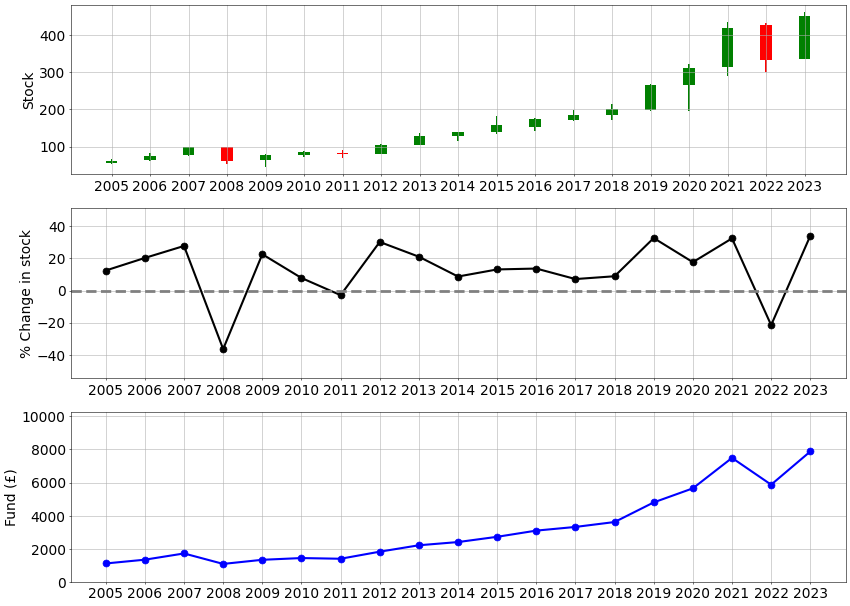

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(20,15), dpi=50)

# Candlestick properties
col1 = 'green'
col2 = 'red'
width = .3
width2 = .03

# Define up and down prices
up = df[df.open >= df.open]
down = df[df.close < df.open]

# Plotting up prices of the stock 
ax[0].bar(up.index, up.close-up.open, width, bottom=up.open, color=col1) 
ax[0].bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1) 
ax[0].bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1) 
  
# Plotting down prices of the stock 
ax[0].bar(down.index, down.close-down.open, width, bottom=down.open, color=col2) 
ax[0].bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2) 
ax[0].bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2) 
ax[0].set_ylabel('Stock')
ax[0].grid()

# Percentage change in stock price over the year
ax[1].plot(df.index, df['% Change'], '-ok', markersize=10, linewidth=3,)
ax[1].set_ylim(df['% Change'].min()*1.5, df['% Change'].max()*1.5)
ax[1].axhline(y=0, linestyle='--', color='grey')
ax[1].set_ylabel('% Change in stock')
ax[1].grid()

# Change in funds based on £1000 initial investment
ax[2].plot(df.index, df['Fund'], '-ob', markersize=10, linewidth=3, )
ax[2].set_ylim(0, df['Fund'].max()*1.3)
ax[2].set_ylabel('Fund (£)')
ax[2].grid()